In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 100
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [2]:
with open("marina_opamp_2.csv") as f:
    data = pd.read_csv(f)

In [3]:
data

,f,a
0,1.69897,86.5839
1,2.00000,80.7304
2,2.30103,75.0271
3,2.69897,67.1217
4,3.00000,61.1373
5,3.30103,54.9998
6,3.69897,47.1220
7,4.00000,41.1941
8,4.30103,35.3541
9,4.69897,27.6513


100.0
1238796.586530369 14.723125024327187
120.2401946355863 - 19.73187918315029·x¹ [6.09370215]


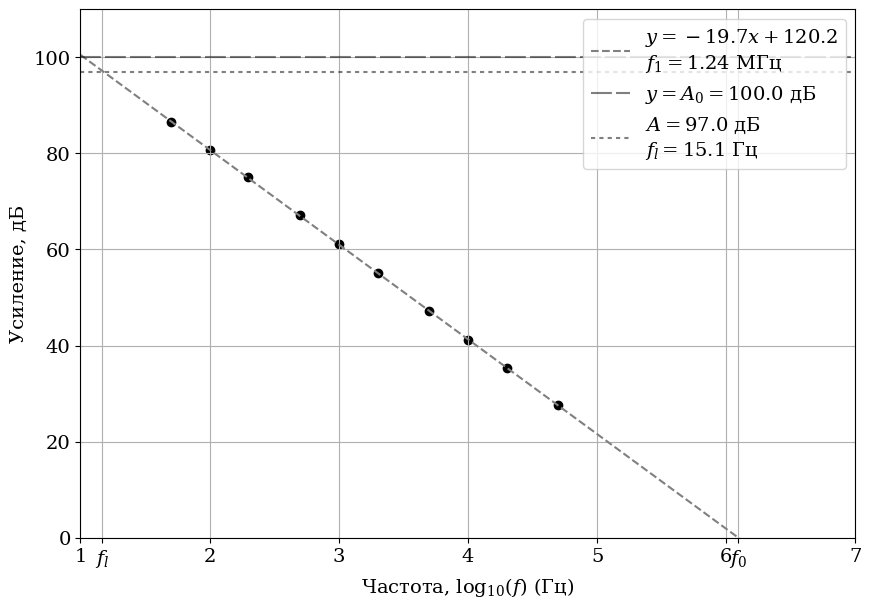

In [15]:
A_0 = 1e5
a_0 = 20 * np.log10(A_0)
print(a_0)

x, y = data.f, data.a

plt.scatter(x, y, color="black")
plt.xlabel("Частота, $\log_{10}(f)$ (Гц)")
plt.ylabel("Усиление, дБ")

from numpy.polynomial import Polynomial
approx = Polynomial.fit(x, y, 1)
x_range = np.linspace(1, 7, 10)
print(10 ** (6.093), 10 ** (1.168))
plt.plot(x_range, approx(x_range), ls="--", color="grey", label="$y = -19.7 x + 120.2$\n$f_1 = 1.24$ МГц")
print(approx.convert(), approx.roots())

plt.hlines(a_0, 1, 7, ls=(0,(10,2)), alpha=0.5, color="black", label=f"$y=A_0={a_0:.1f}$ дБ")
plt.hlines(a_0 - 3, 1, 7, ls=(0,(2,2)), alpha=0.5, color="black", label=f"$A={a_0 - 3:.1f}$ дБ\n$f_l = {10 ** ((120.2 - 97) / 19.7):.1f}$ Гц")

plt.xlim(1, 7)
plt.xticks([i for i in range(1, 8)] + [1.168, 6.093], [i for i in range(1, 8)] + ["$f_l$", "$f_0$"])
plt.ylim(0, 110)
plt.legend()
plt.savefig("marina_opamp_2.pdf")

In [16]:
with open("marina_opamp_4.csv") as f:
    data_2 = pd.read_csv(f)

In [17]:
data_2

,a,f,f_log
0,46.319600,50,1.69897
1,46.760098,100,2.00000
2,46.763022,200,2.30103
3,46.895468,500,2.69897
4,46.596035,1000,3.00000
5,46.087608,2000,3.30103
6,43.719888,5000,3.69897
7,39.794066,10000,4.00000
8,34.591813,20000,4.30103
9,26.898867,50000,4.69897


107.02830774078474 - 16.953656281823886·x¹
13446.213415344873


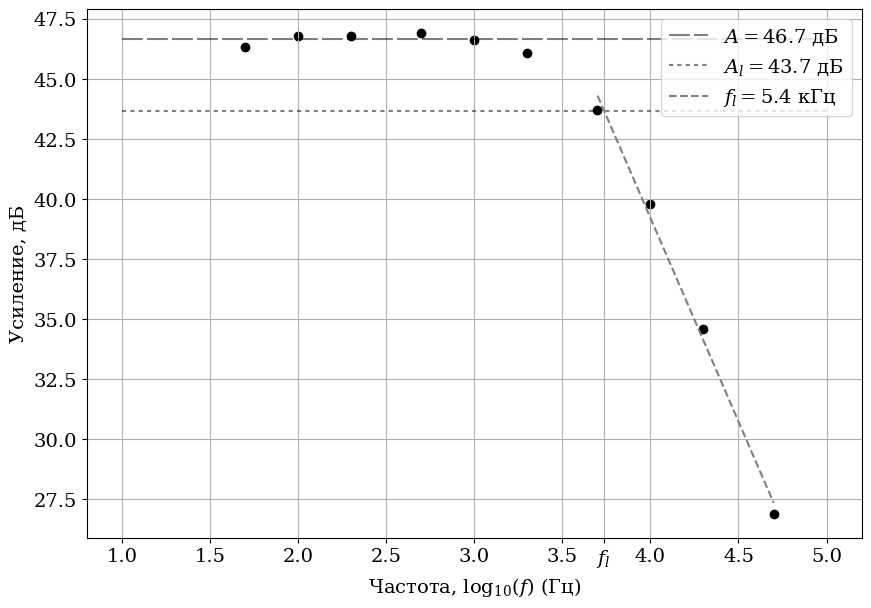

In [22]:
x, y = data_2.f_log, data_2.a
a = np.mean(y[:5])

plt.scatter(x, y, color="black")
plt.hlines(a, 1, 5, ls=(0,(10,2)), alpha=0.5, color="black", label=f"$A={a:.1f}$ дБ")
plt.hlines(a - 3, 1, 5, ls=(0,(2,2)), alpha=0.5, color="black", label=f"$A_l={a - 3:.1f}$ дБ")

approx = Polynomial.fit(x[-4:], y[-4:], 1)
x_range = np.linspace(3.7, 4.7, 10)
print(approx.convert())
plt.plot(x_range, approx(x_range), ls="--", color="grey", label=f"$f_l = 5.4$ кГц")
print(10**(4.1286))

plt.xlabel("Частота, $\log_{10}(f)$ (Гц)")
plt.ylabel("Усиление, дБ")
plt.xticks([i for i in np.arange(1, 5.5, 0.5)] + [3.734], [i for i in np.arange(1, 5.5, 0.5)] + ["$f_l$"])

plt.legend()
plt.savefig("marina_opamp_4.pdf")

In [23]:
with open("marina_opamp_8.csv") as f:
    data_3 = pd.read_csv(f)

In [24]:
data_3

,f_log,a_db
0,1.00000,14.261893
1,1.69897,10.022188
2,2.00000,4.384729
3,2.00000,-14.044954
4,4.00000,-24.707756
5,5.00000,-27.244836


18.71952499932755 - 9.877444063805187·x¹


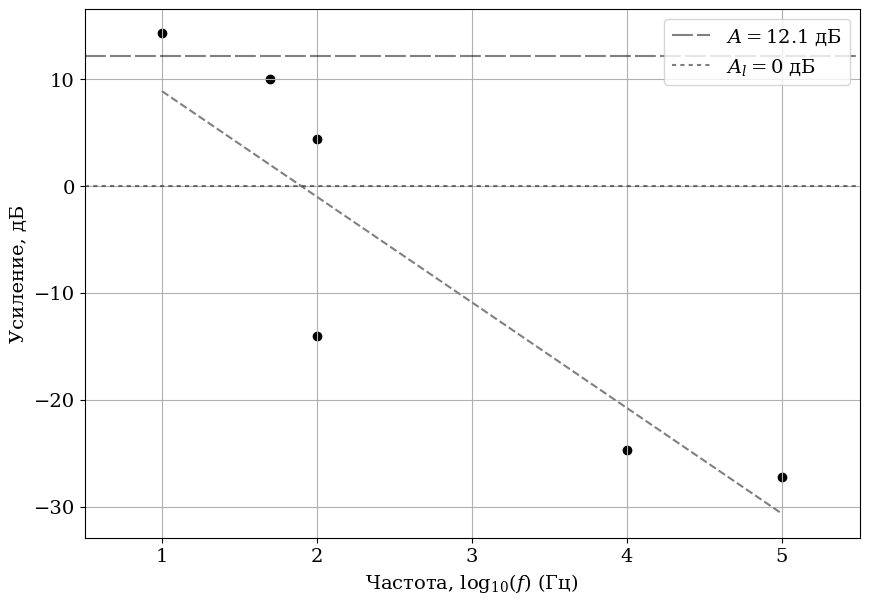

In [25]:
x, y = data_3.f_log, data_3.a_db
plt.scatter(x, y, color="black")

approx = Polynomial.fit(x[1:], y[1:], 1)
x_range = np.linspace(1, 5)
print(approx.convert())
plt.plot(x_range, approx(x_range), ls="--", color="grey", label="")

a = np.mean(y[:2])
plt.hlines(a, 0.5, 5.5, ls=(0,(10,2)), alpha=0.5, color="black", label=f"$A={a:.1f}$ дБ")
plt.hlines(0, 0.5, 5.5, ls=(0,(2,2)), alpha=0.5, color="black", label=f"$A_l={0}$ дБ")


plt.xlabel("Частота, $\log_{10}(f)$ (Гц)")
plt.ylabel("Усиление, дБ")
plt.xlim(0.5, 5.5)

plt.legend()
plt.savefig("marina_opamp_8.pdf")